In [1]:
import pandas as pd

df_data = pd.read_excel("../data_to_work_dm_12042022/Base de datos 13.10.2017 - _MAN_actualizado 19.10.17.xlsx", sheet_name="Update-2", skiprows=1)
df_data

,ID MUESTRA,NOMBRE,APELLIDO PATERNO,APELLIDO MATERNO,[ug/ml],Flag,Dilution,[450],MAX,MIN,...,B/BO MEDIDO 450 NM.1,CONCENTRACIÓN 450 NM,OD1 492 NM,OD2 492 NM,PROMEDIO OD 492 NM,B/BO MEDIDO A 492 NM,CONCENTRACIÓN 492 NM,OBSERVACION 1,OBSERVACION 2,% CV OD450 NM
0,001-1,Maximiliano,Cárdenas,Catelicán,20.076728,PASS,5.0,4.015346,6.616227,NaN,...,0.906645,4.164252,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN,1.696570
1,001-2,Maximiliano,Cárdenas,Catelicán,31.719207,PASS,5.0,6.343841,9.948513,3.521333,...,0.841147,9.944393,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN,1.054782
2,001-3,Maximiliano,Cárdenas,Catelicán,23.453752,PASS,5.0,4.690750,7.594311,2.463598,...,0.884381,6.055710,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN,3.587601
3,001-4,Maximiliano,Cárdenas,Catelicán,25.016903,PASS,5.0,5.003381,8.043302,2.659766,...,0.875141,6.861995,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN,0.181822
4,004-1,Martín,Pérez,González,28.584920,PASS,5.0,5.716984,9.061069,3.114614,...,0.856047,8.570093,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN,0.704096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,065-4,Pilar,Catalán,Olila,24.854455,PASS,1.0,24.854455,56.082239,9.066338,...,0.661132,35.695335,0.1449,0.12210,0.133500,0.741255,33.080489,NaN,NaN,0.620655
133,066-1,Evolet,Cardozo,Legüe,83.680568,PASS,5.0,16.736114,20.155173,13.702322,...,0.655830,0.655830,0.1968,0.26560,0.231200,0.691698,0.691698,NaN,NaN,4.093375
134,066-2,Evolet,Cardozo,Legüe,35.309869,PASS,5.0,7.061974,8.818623,5.493324,...,0.763820,0.763820,0.2551,0.27330,0.264200,0.790426,0.790426,NaN,NaN,5.826684
135,066-3,Evolet,Cardozo,Legüe,156.480231,PASS,5.0,31.296046,21.810159,0.599694,...,0.599694,0.198700,0.2319,0.21530,0.644129,0.644129,NaN,NaN,0.56735,NaN


In [2]:
matrix_data = []

for column in df_data.columns:
    count_null = df_data[column].isna().sum()
    percentage = count_null/len(df_data)*100
    row = [column, count_null, percentage]
    matrix_data.append(row)

df_summary = pd.DataFrame(matrix_data, columns=['columna', 'count', 'percentage'])
df_summary = df_summary.sort_values(by=['percentage'], ascending=False)
df_summary

,columna,count,percentage
22,OBSERVACION 2,132,96.350365
21,OBSERVACION 1,100,72.992701
20,CONCENTRACIÓN 492 NM,39,28.467153
19,B/BO MEDIDO A 492 NM,37,27.007299
18,PROMEDIO OD 492 NM,37,27.007299
17,OD2 492 NM,37,27.007299
16,OD1 492 NM,37,27.007299
9,MIN,31,22.627737
23,% CV OD450 NM,6,4.379562
15,CONCENTRACIÓN 450 NM,5,3.649635


In [3]:
columns_to_plot = ['[ug/ml]',
'Dilution',                 
'[450]',  
'MAX',    
'MIN',    
'B/BO MEDIDO 450 NM',       
'OD1 450 NM',               
'OD2 450 NM',               
'PROMEDIO OD 450 NM',       
'B/BO MEDIDO 450 NM.1',     
'CONCENTRACIÓN 450 NM',     
'OD1 492 NM',               
'OD2 492 NM',               
'PROMEDIO OD 492 NM',       
'B/BO MEDIDO A 492 NM',     
'CONCENTRACIÓN 492 NM',          
'% CV OD450 NM']


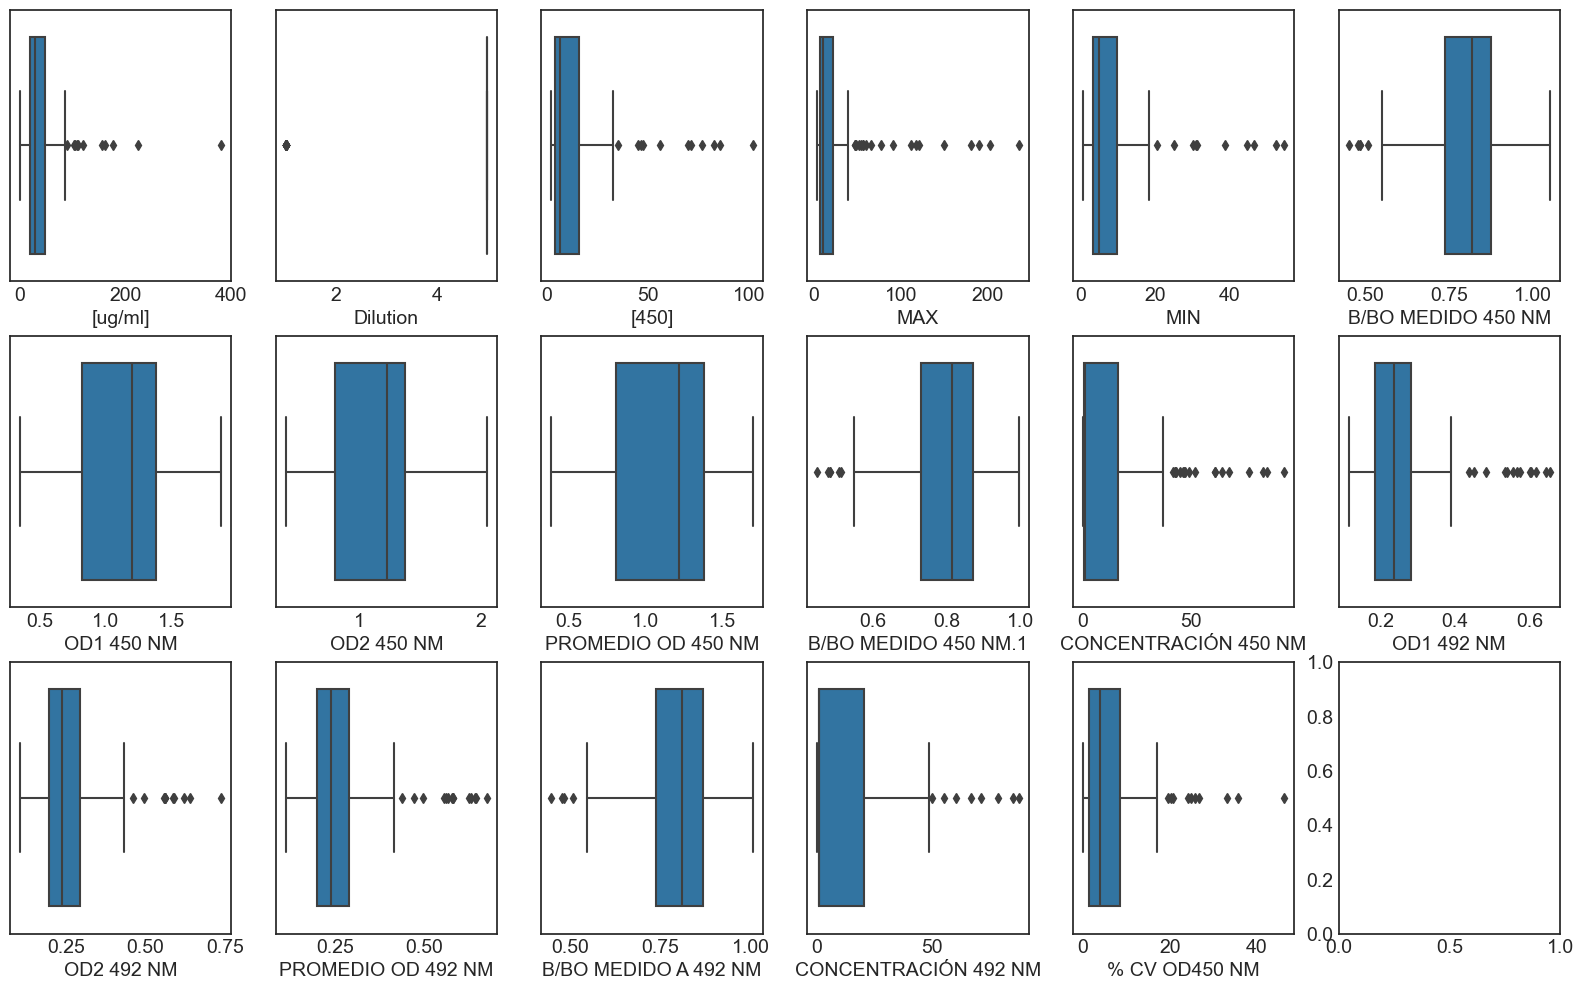

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(3, 6, figsize=(20, 12))

i = 0
j = 0
index =0

for column in columns_to_plot:
    index+=1
    sns.boxplot(ax=axes[i][j], x=df_data[column])

    if index == 6 or index==12:
        i += 1
        j = 0
    else:
        j+=1

